In [1]:
#importing the brand new things!!
import cerf
import pandas as pd
import plotly.express as px
import dash

import geopandas as gpd
import plotly.graph_objects as go

import dash_bootstrap_components as dbc
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output


In [2]:
graphcolor = "#FFFFFF"
df = pd.read_csv('example_cerf_output (1).csv')
df
#print the titles/info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   region_name                            8369 non-null   object 
 1   tech_id                                8369 non-null   int64  
 2   tech_name                              8369 non-null   object 
 3   unit_size_mw                           8369 non-null   float64
 4   xcoord                                 8369 non-null   float64
 5   ycoord                                 8369 non-null   float64
 6   index                                  8369 non-null   int64  
 7   buffer_in_km                           8369 non-null   int64  
 8   sited_year                             8369 non-null   int64  
 9   retirement_year                        8369 non-null   int64  
 10  lmp_zone                               8369 non-null   int64  
 11  loca

In [3]:
new_df = df.loc[(df["sited_year"] == 2030)].copy()

new_df["interconnection_cost_usd_per_year"].describe()
ic_df1 = new_df.groupby("region_name")["interconnection_cost_usd_per_year"].median()
ic_df = ic_df1.to_frame()

code = ['AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA',
        'IA','ID','IL','IN','KS','KY','LA','MA','MD','ME',
          'MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM',
          'NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX',
          'UT','VA','VT','WA','WI','WV','WY']
ic_df['codes'] = code


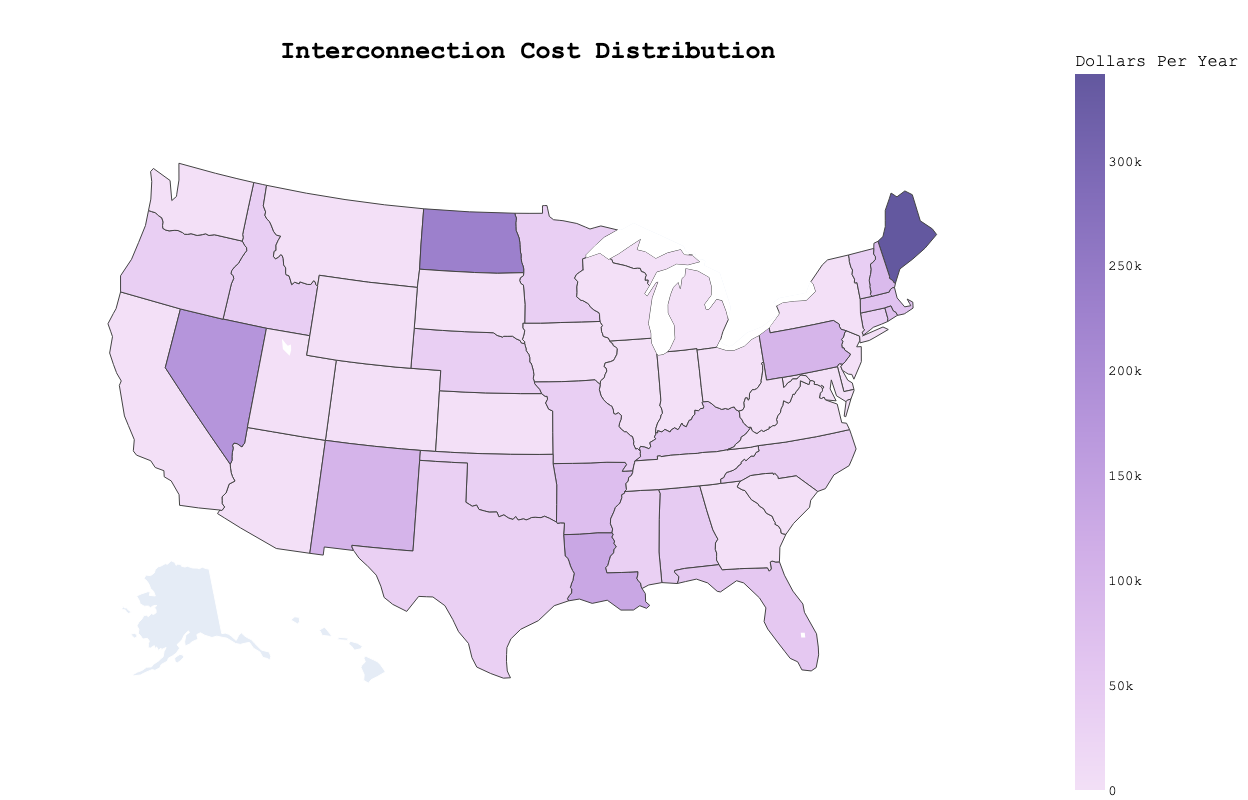

In [4]:
# create choropleth map for the data
# color will be the column to be color-coded
# locations is the column with spatial coordinates
fig = px.choropleth(ic_df,locations='codes',
                        locationmode="USA-states", color='interconnection_cost_usd_per_year', 
                        scope="usa", color_continuous_scale="purp",
                        labels={"interconnection_cost_usd_per_year": "Dollars Per Year"
                        }
    )

fig.update_layout(
    title={
            'text': "<b>Interconnection Cost Distribution</b>",
            'y':.95,
            'x':0.423,
            'xanchor': 'center',
            'yanchor': 'top'},
        font = dict(
            family="Courier New",
            size=14,
            color="Black"
        ),
        height = 800,
        geo_bgcolor=graphcolor,
        paper_bgcolor=graphcolor,
        geo = dict(
                scope = "usa",
                lonaxis_range= [ 125, 60 ],
                lataxis_range= [25, 50],
            ),
    title_font_size = 25

    )

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})


In [5]:
app = JupyterDash(__name__)

In [6]:
new_df['region_name'] = df['region_name'].str.title()
new_df.replace('_', ' ',regex=True,inplace=True)

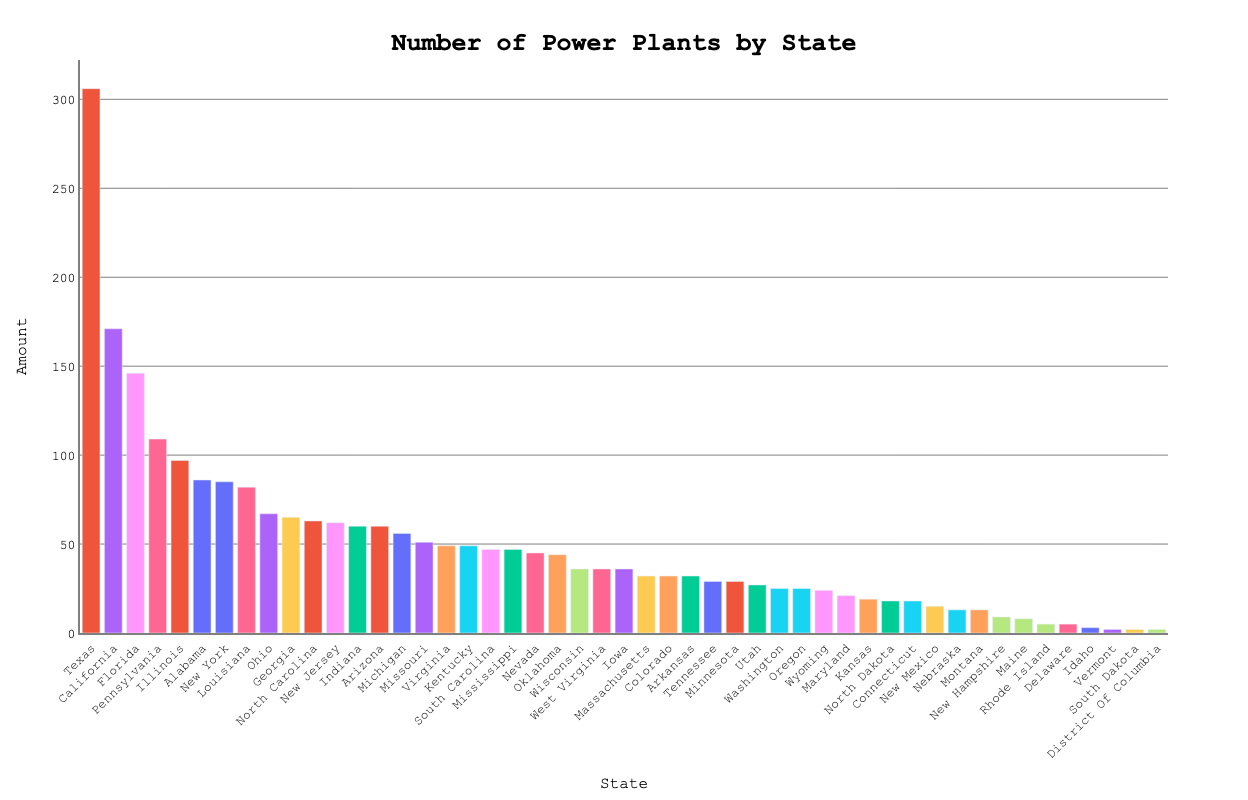

In [7]:
df1 = new_df.groupby(["region_name"]).count().reset_index()

bar_fig = px.bar(df1,
             y=new_df.groupby(["region_name"]).size(),
             x="region_name",
             color='region_name',
            labels ={
                "region_name": "State",
                "y": "Amount"
                 })

bar_fig.update_layout(showlegend=False)
bar_fig.update_layout(
    title={
        'text': "<b>Number of Power Plants by State<b>",
        'y':.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font = dict(
        family="Courier New",
        size=13,
        color="Black"
    ),
    plot_bgcolor=graphcolor,
    paper_bgcolor=graphcolor,
    height = 800,
    title_font_family="Courier New",
    title_font_color="Black",
    title_font_size = 25


)

bar_fig.update_layout(xaxis={'categoryorder':'total descending'},xaxis_tickangle=-45)
bar_fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
bar_fig.update_xaxes(showline=True, linewidth=2, linecolor='gray')
bar_fig.update_yaxes(showline=True, linewidth=2, linecolor='gray')


bar_fig.show()



In [8]:
scatter_df = df.loc[(df["sited_year"] == 2030)].copy()
gdf = gpd.GeoDataFrame(scatter_df, 
                       geometry=gpd.points_from_xy(scatter_df["xcoord"], scatter_df["ycoord"]),
                       crs="ESRI:102003")

# let's take a look at our geometry field
gdf.geometry


1553     POINT (856947.164 -638565.201)
1554     POINT (815947.164 -360565.200)
1555     POINT (978947.164 -492565.200)
1556     POINT (847947.164 -674565.201)
1557     POINT (792947.164 -462565.200)
                     ...               
3911    POINT (-1123052.836 662434.799)
3912     POINT (-715052.836 568434.799)
3913     POINT (-754052.836 818434.799)
3914    POINT (-1240052.836 523434.800)
3915    POINT (-1196052.836 572434.799)
Name: geometry, Length: 2363, dtype: geometry

In [9]:
gdf.to_crs("EPSG:4326", inplace=True)

# notice the change in the geometry of each point to a lat, lon value
gdf.geometry


1553     POINT (-86.93917 31.42130)
1554     POINT (-87.09553 33.93727)
1555     POINT (-85.48885 32.61220)
1556     POINT (-87.06943 31.10684)
1557     POINT (-87.44507 33.04670)
                   ...             
3911    POINT (-109.83501 42.68342)
3912    POINT (-104.73931 42.28081)
3913    POINT (-105.51799 44.47647)
3914    POINT (-110.98552 41.29704)
3915    POINT (-110.55214 41.79044)
Name: geometry, Length: 2363, dtype: geometry

In [10]:
gdf['region_name'] = gdf['region_name'].str.title()
gdf["region_name"].replace('_', ' ',regex=True,inplace=True)
gdf

region_name  tech_id             tech_name  unit_size_mw        xcoord  \
1553     Alabama        4  coal_conv_pul_wo_ccs         600.0  8.569472e+05   
1554     Alabama        4  coal_conv_pul_wo_ccs         600.0  8.159472e+05   
1555     Alabama        4  coal_conv_pul_wo_ccs         600.0  9.789472e+05   
1556     Alabama        4  coal_conv_pul_wo_ccs         600.0  8.479472e+05   
1557     Alabama        4  coal_conv_pul_wo_ccs         600.0  7.929472e+05   
...          ...      ...                   ...           ...           ...   
3911     Wyoming       17     solar_pv_non_dist          80.0 -1.123053e+06   
3912     Wyoming       18          wind_onshore         251.0 -7.150528e+05   
3913     Wyoming       18          wind_onshore         251.0 -7.540528e+05   
3914     Wyoming       18          wind_onshore         251.0 -1.240053e+06   
3915     Wyoming       18          wind_onshore         251.0 -1.196053e+06   

           ycoord     index  buffer_in_km  sited_year  retirement_year  ...  \
1553 -638565.2005  10553126             5        2030             2090  ...   
1554 -360565.2005   9248431             5        2030             2090  ...   
1555 -492565.2005   9868070             5        2030             2090  ...   
1556 -674565.2005  10722065             5        2030             2090  ...   
1557 -462565.2005   9727094             5        2030             2090  ...   
...           ...       ...           ...         ...              ...  ...   
3911  662434.7995   4445553             5        2030             2060  ...   
3912  568434.7995   4887103             5        2030             2060  ...   
3913  818434.7995   3713814             5        2030             2060  ...   
3914  523434.7995   5097763             5        2030             2060  ...   
3915  572434.7995   4867850             5        2030             2060  ...   

      fuel_co2_content_tons_per_btu  fuel_price_usd_per_mmbtu  \
1553                        0.36036                   2.45646   
1554                        0.36036                   2.45646   
1555                        0.36036                   2.45646   
1556                        0.36036                   2.45646   
1557                        0.36036                   2.45646   
...                             ...                       ...   
3911                        0.00000                   0.00000   
3912                        0.00000                   0.00000   
3913                        0.00000                   0.00000   
3914                        0.00000                   0.00000   
3915                        0.00000                   0.00000   

      fuel_price_esc_rate_fraction  heat_rate_btu_per_kWh  lifetime_yrs  \
1553                       0.00804                 7861.8          60.0   
1554                       0.00804                 7861.8          60.0   
1555                       0.00804                 7861.8          60.0   
1556                       0.00804                 7861.8          60.0   
1557                       0.00804                 7861.8          60.0   
...                            ...                    ...           ...   
3911                       0.00000                 3412.0          30.0   
3912                       0.00000                 3412.0          30.0   
3913                       0.00000                 3412.0          30.0   
3914                       0.00000                 3412.0          30.0   
3915                       0.00000                 3412.0          30.0   

      variable_om_usd_per_mwh  variable_om_esc_rate_fraction  \
1553                 3.873467                      -0.003990   
1554                 3.873467                      -0.003990   
1555                 3.873467                      -0.003990   
1556                 3.873467                      -0.003990   
1557                 3.873467                      -0.003990   
...                       ...            

In [11]:
gdf['text'] ="Type: " + gdf["tech_name"]


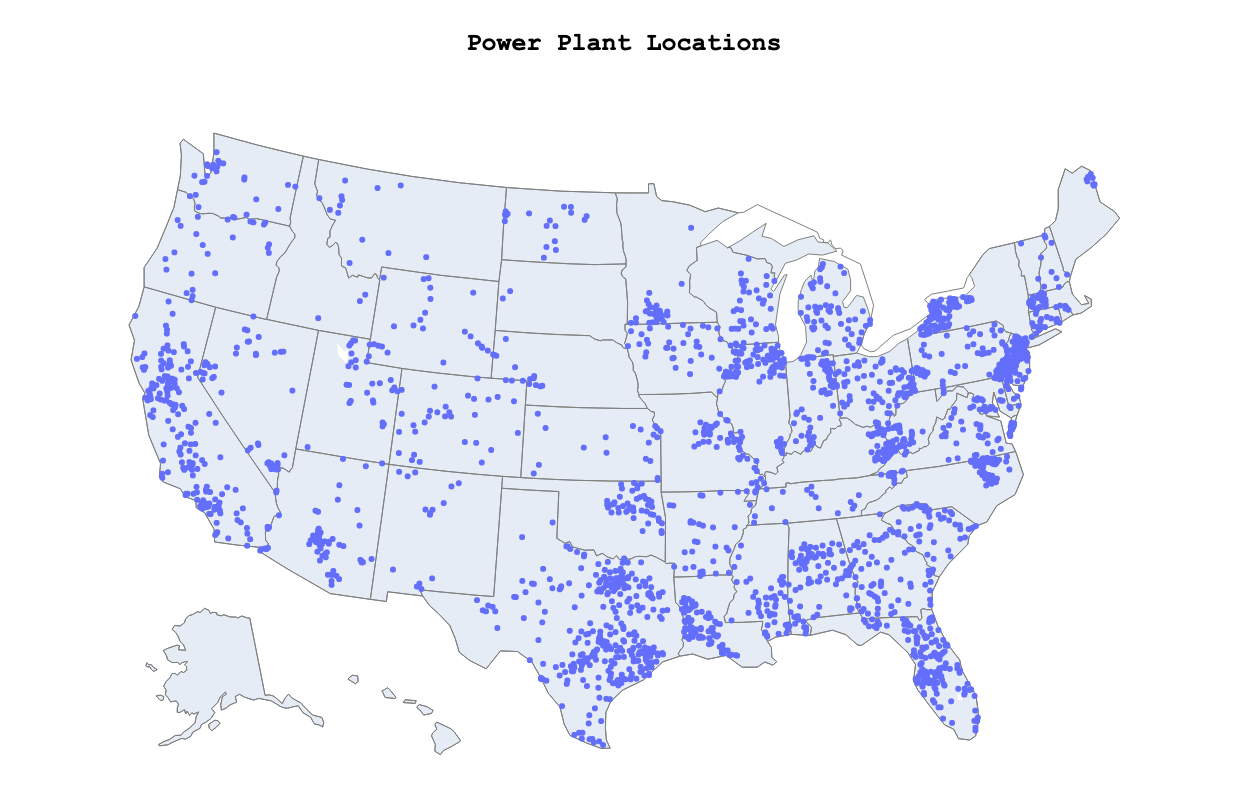

In [12]:
scafig = go.Figure(data=go.Scattergeo(
        lon = gdf.geometry.x,
        lat = gdf.geometry.y,
        text = gdf['text'],

        ))

scafig.update_layout(
        geo_scope='usa',
        
    )

scafig.update_layout(
    title={
        'text': "<b>Power Plant Locations</b>",
        'y':.96,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        },
    font = dict(
        family="Courier New",
        size=14,
        color="Black"
    ),
    geo_bgcolor=graphcolor,
    paper_bgcolor = graphcolor,
    height = 800,
    title_font_size = 25



)

scafig.update_geos(
    showcountries=True, countrycolor="Grey",
    showsubunits=True, subunitcolor="Grey",
 
)

scafig.update_layout(margin={"r":0,"t":80,"l":0,"b":0})


scafig.show()


In [13]:
stacked_df = df.loc[(df["sited_year"] == 2030)].copy()
stacked_df
sum_df = new_df.groupby(by=['region_name','tech_name'])['generation_mwh_per_year'].sum().reset_index()
sum_df['region_name'] = sum_df['region_name'].str.title()
sum_df["region_name"].replace('_', ' ',regex=True,inplace=True)
sum_df

region_name             tech_name  generation_mwh_per_year
0       Alabama  coal conv pul wo ccs             3.467383e+07
1       Alabama          gas cc w ccs             1.149312e+08
2       Alabama         gas cc wo ccs             2.596464e+07
3       Alabama        nuclear gen ii             3.193020e+07
4       Alabama     solar pv non dist             2.394634e+06
..          ...                   ...                      ...
249     Wyoming  coal conv pul wo ccs             5.008442e+07
250     Wyoming          gas cc w ccs             1.401600e+07
251     Wyoming             solar csp             3.924480e+05
252     Wyoming     solar pv non dist             1.408608e+05
253     Wyoming          wind onshore             4.028128e+06

[254 rows x 3 columns]

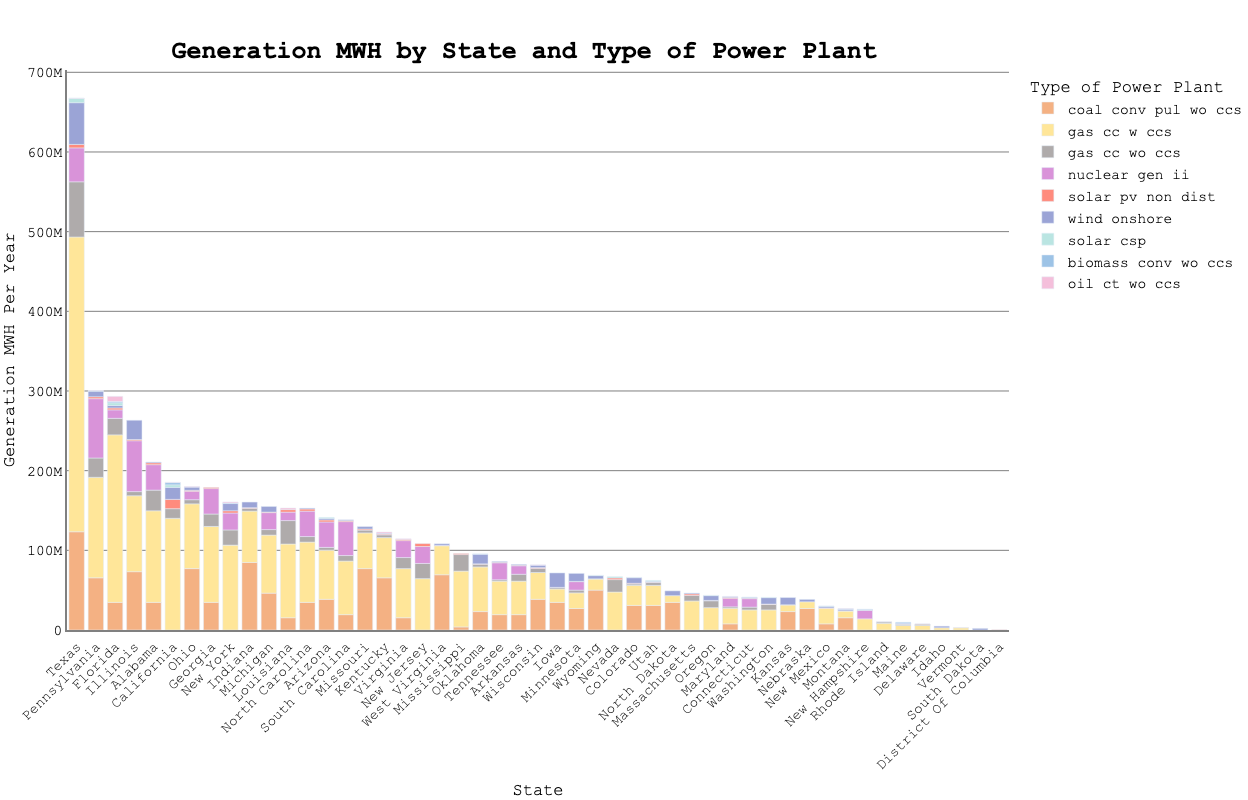

In [14]:
stackfig = px.bar(sum_df, x="region_name", 
             y="generation_mwh_per_year", 
             color="tech_name",
            labels ={
                "tech_name": "Type of Power Plant",
                "y": "Amount", 
                "region_name":"State",
                "generation_mwh_per_year":"Generation MWH Per Year",
                 },
            color_discrete_map={"biomass conv wo ccs": "#9DC3E6", 
                                  "gas cc w ccs": "#FFE699",
                                  "gas cc wo ccs":"#AFABAB",
                                  "oil ct wo ccs":"#F4BFDB",
                                 "solar csp":"#BAE5E2",
                                  "solar pv non dist":"#FF8B7D",
                                  "wind onshore":"#9BA4D6",
                                 "biomass igcc wo ccs":"#C5E0B4",
                                 "coal conv pul wo ccs":"#F4B183",
                                 "nuclear gen iii":"#AB7BFF",
                                 "nuclear gen ii":"#D993D9"} 

)
stackfig.update_layout(
    title={
        'text': "<b>Generation MWH by State and Type of Power Plant</b>",
        'y':.95,
        'x':0.42,
        'xanchor': 'center',
        'yanchor': 'top',
},      
    
    title_font_size = 25,
    font = dict(
        family="Courier New",
        size=14.5,
        color="Black",
    ),
    height = 800,
    plot_bgcolor=graphcolor,
    paper_bgcolor=graphcolor,
    xaxis={'categoryorder':'total descending'},xaxis_tickangle=-45),

stackfig.update_layout(margin={"r":0,"t":20,"l":0,"b":0})
stackfig.update_layout(margin={"r":0,"t":70,"l":0,"b":0})
stackfig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')
stackfig.update_xaxes(showline=True, linewidth=2, linecolor='gray')
stackfig.update_yaxes(showline=True, linewidth=2, linecolor='gray')


In [15]:
app.layout = html.Div([
    html.Div(id = 'parent', children = [
        html.H1(id = 'H1', children = '  CERF Visualizations', style = {'textAlign':'center',
                                            'marginTop':0,'marginBottom':0,"font-size": 65,"color":"black","background-color":"#e0e0e0"}),
    
        html.Div('''This visualizations app was created to easily display the output of CERF (Capacity Expansion Regional Feasibility) through
        a variety of graphs. Upload your specific CERF output file by clicking below || created using Jupyter Lab, Plotly, & Dash :)''',style = {'textAlign':'center',\
                                            'marginTop':0,'marginBottom':26,"font-size": 30,"background-color":"#e0e0e0"}),
    ]),
    
    html.Div([
        dcc.Graph(
            id='example-graph',
            figure=fig,
            style={"border-style":"solid",
                   "border-width":5,
                   "margin":5,
                  },        
            
        ),  
        
        dcc.Graph(
            id = 'bar-graph',
            figure = bar_fig,
            style={"border-style":"solid",
                   "border-width":5,
                    "margin":5}

    ),
    ], style={"width":"49%",'display': 'inline-block'}),

    html.Div([
        dcc.Graph(
            id = 'stacked-graph',
            figure = stackfig,
            style={"border-style":"solid",
                   "border-width":5,
                    "margin":5}

        ),
        dcc.Graph(
            id='scatter-graph',
            figure=scafig,
            style={"border-style":"solid",
                   "border-width":5,
                    "margin":5}

        )
    ], style= {'display': 'inline-block',"width":"49%"})
],style={"background-color":"#e0e0e0","text-align":"center"})

if __name__ == '__main__':
    app.run_server(port= 8051, debug=True)

Dash app running on http://127.0.0.1:8051/
